In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import os
import pickle
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [24]:
import warnings
warnings.filterwarnings("ignore")

# визуализация

In [25]:
path_to_dataset = './../data/mnist/'
dataset_name = 'mnist.pkl.gz'

# Открываем архив при помощи контекстного менеджера и читаем пикл файл
f = gzip.open(os.path.join(path_to_dataset, dataset_name), 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

# Раскладываем данные по выборкам
X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

# Смотрим на размеры датасетов
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


In [26]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)

In [27]:
X_reduced.shape

(50000, 2)

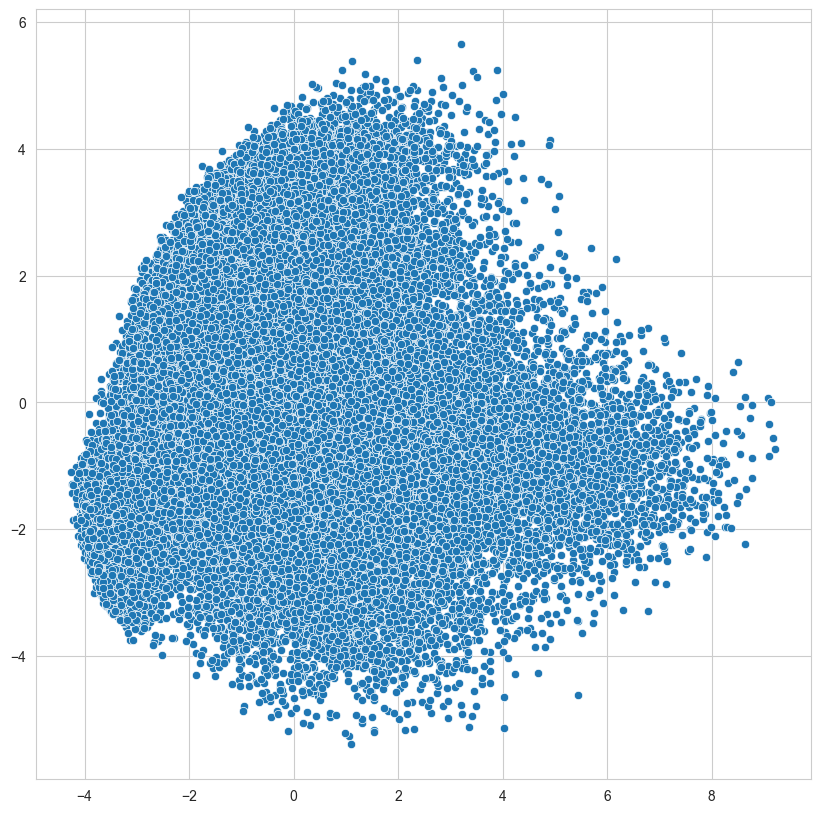

In [28]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=X_reduced[:, 0], 
    y=X_reduced[:, 1]
    # hue=y_train.astype(int),
    # palette="CMRmap",
    # legend='full'
);

# TSNE

**t-Distributed Stochastic Neighbour Embedding.**

Нетривиальная математическая модель.

**Смысл модели:**

- У нас изначально есть некоторые данные (признаки и объекты). Теперь мы можем попарно посчитать расстояния между нашими объектами и получить матрицу попарных расстояний.

- Теперь мы хотим сжать наше пространство таким образом, чтобы наши попарные расстояния между объектами сохранились (пусть не в абсолютных, но в относительных метриках).

- Пытаемся приблизить распределение изначальных данных к вероятностному распределению расстояний в сжатом пространстве.

**Более быстрые и масштабируемые реализации алгоритма tSNE**:
- [MultiCore-tSNE](https://github.com/DmitryUlyanov/Multicore-TSNE)
- [tSNE CUDA](https://github.com/CannyLab/tsne-cuda)


# Гиперпараметры очень важны

Основных гиперпараметра всего 2 - perplexity (перплексия) и эпсилон (~learning rate).

Перплексия - это метрика компактности нашего множества (по простому - это число соседей, на которые алгоритм будет смотреть для того, чтобы рассчитать расстояния между ними). Тем меньше показатель перплексии, тем больше модель учитывает локальные особенности распределения наших наблюдений и вероятнее всего по низкому показателю перплексии алгоритм не будет способен показать какое-то эффективное качество решения.

**Главной задачей в алгоритме является подбор параметра перплексии для ваших данных. На практике показатель перплексии обычно варьируется от 5 до 50.**

Чем хорош данный алгоритм - он позволяет сжимать нелинейные данные в линейные представления.


**О чем важно помнить:** данная модель, точнее ее представления - неинтерпритируемы, так как мы кодируем изначальные распределения в вероятностное распределение попарных расстояний признаков. **Из этого следует что размер наших классов, которые мы получим на выходе - не имеет никакого смысла. Мы не можем ориентироваться ни на оси ни на расстояния между объектами наших кластеров. Но если классы появляются, то какая-то структура в наших наблюдениях все таки есть.**

Случайный шум - действительно случайный шум, не стоит воспринимать кластера как какую-то структуру данных.


Для чего нужен вообще tSNE:
1. Довольно недорогой способ быстро познакомиться со структурой ваших данных.
2. Как этап препроцесиинга данный алгоритм использовать нельзя, так как эмдбеддинги соответствуют только исходным данным.
3. Применяется в основном для Data Exploration

![](./../pics/hyperparams.png)

# Расстояния между кластерами (возможно) не имеют значения

![](./../pics/hyp.png)

# Случайный шум может показаться не случайным
![](./../pics/noise.png)

In [7]:
from sklearn.manifold import TSNE

# verbose = True/False
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X_train)

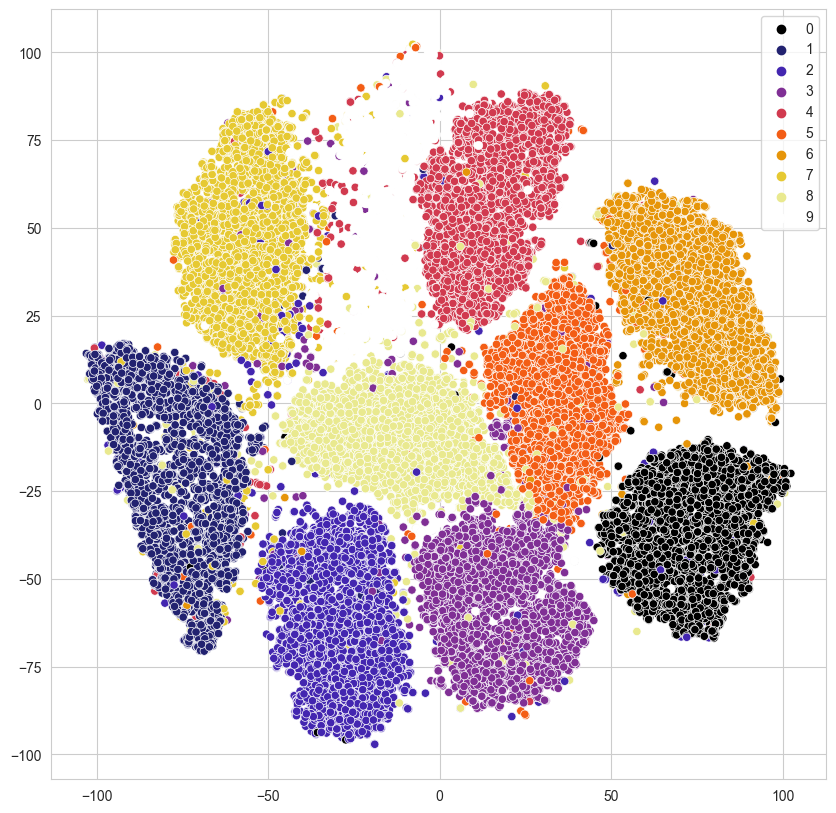

In [8]:
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_transformed[:, 0], 
    y=tsne_transformed[:, 1], 
    hue=y_train.astype(int),
    palette="CMRmap",
    legend='full'
);

http://lvdmaaten.github.io/tsne

### Кейс с исследованием данных

In [31]:
# Breast Cancer Dataset. 1. Id 2. Diagnosis (M = malignant, B = benign) 3 -32)
df = pd.read_csv("./../data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [32]:
# Categorical Variables Encoding and deleting the last column (Unnamed 32):
df['diagnosis'] = pd.Categorical(df.diagnosis).codes
df.drop(df.columns[len(df.columns) - 1], axis=1, inplace=True)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,842517,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,84300903,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,84348301,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,84358402,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [33]:
# basic dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int8   
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Теперь, первый шаг - интересно существует ли вообще какая-либо структура наших многомерных данных в двумерном представлении:

In [34]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

print(X.shape, "\n",y.shape)

(569, 30) 
 (569,)


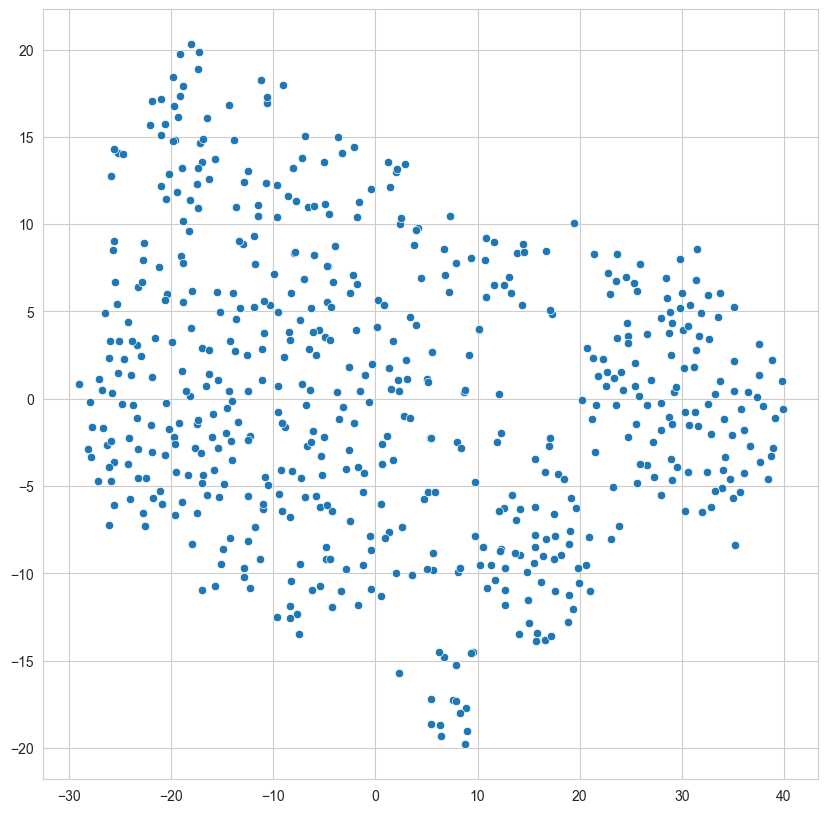

In [44]:
from sklearn.preprocessing import StandardScaler

tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
scaler = StandardScaler()

tsne_transformed = tsne.fit_transform(scaler.fit_transform(X))

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_transformed[:, 0],
    y=tsne_transformed[:, 1],
    # hue=y.astype(int),
    # palette='CMRmap',
    # legend='full'
);

Фантастический результат, который показывает что мы можем довольно неплохо разделить наши классы и легко определить, где опухоль злокачественная, а где нет. Попробуем построить простую модельку и посмотреть на качество:

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [46]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegressionCV(cv=5)
lr.fit(X_train, y_train)

LogisticRegressionCV(cv=5)

In [47]:
y_pred = lr.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.9963492990654206

In [48]:
import numpy as np


def analyzePCA(X, pca, explained_threshold=0.95):
    """Plot cumulative explaned variance of PCA"""
    pca.fit(X)
    pca_variance = pca.explained_variance_ratio_
    plt.figure(figsize=(15,7))
    plt.plot(np.cumsum(pca_variance))
    plt.hlines(explained_threshold, 0, len(pca_variance))
    plt.title("Number of components to explain {}% of variance: {}".format(
        100*explained_threshold, np.argwhere(np.cumsum(pca_variance)>0.95)[0]
    ))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

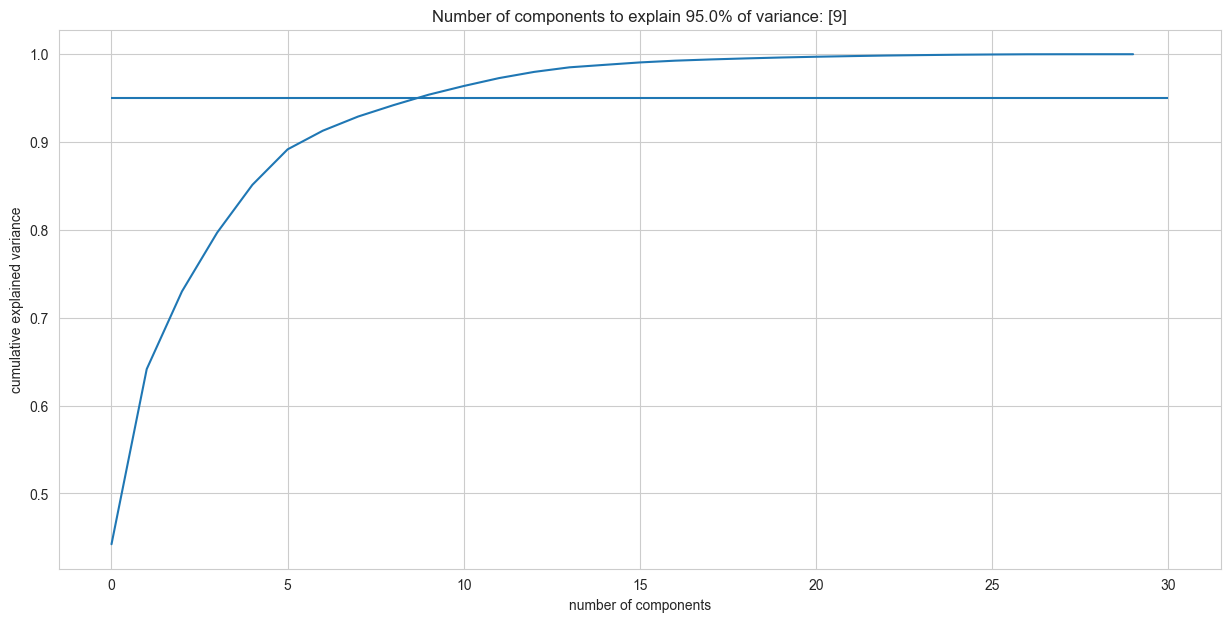

In [49]:
pca = PCA()
analyzePCA(X_train, pca)

In [50]:
pca = PCA(n_components=9)
x_train_pca = pca.fit_transform(X_train)

lr = LogisticRegressionCV(cv=5)
lr.fit(x_train_pca, y_train)
y_pred = lr.predict(pca.transform(X_test))
roc_auc_score(y_test, y_pred)

0.9640771028037383